## About
This program predicts the future prices of a stock using Monte Carlo simulations.

## Import modules

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from dateutil.relativedelta import relativedelta
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Download the historical data

#### Set start date and end date

In [2]:
start_date = datetime.now() - relativedelta(months=12)
start_date = start_date.strftime('%Y-%m-%d')
end_date = str(datetime.now().strftime('%Y-%m-%d'))

#### Fetch data from Yahoo Finance

In [3]:
ticker = 'TSLA'
df = pd.DataFrame()
df[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

[*********************100%***********************]  1 of 1 completed


#### Plot the source data

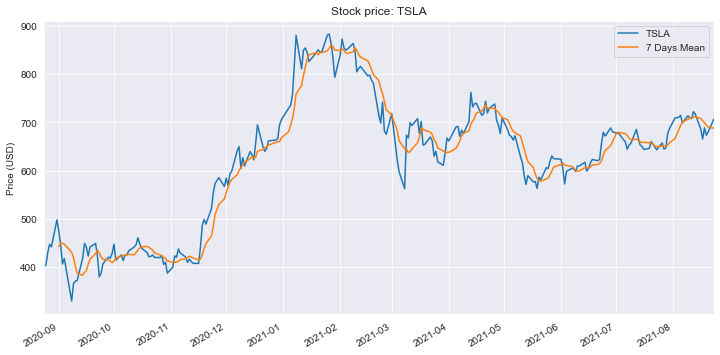

In [4]:
df['7 Days Mean'] = df.rolling(window=7).mean()
title='Stock price: ' + ticker
ylabel='Price (USD)'
xlabel=''
ax = df.plot(figsize=(12, 6), title=title)
ax.autoscale(tight=True, axis='x')
ax.set(xlabel='', ylabel=ylabel)
df.drop('7 Days Mean', inplace=True, axis=1)

## Predict the stock price using Monte Carlo method

#### Set the simulation parameters

In [5]:
# number of future days
t_intervals = 10
# number of iterations for MC method
iterations = 100000

#### Perform Monte Carlo simulations

In [6]:
log_return = np.log(df.pct_change() + 1)

In [7]:
u = log_return.mean()
var = log_return.var()
drift = u - 0.5*var
stdev = log_return.std()

In [8]:
daily_return = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals+1, iterations)))

In [9]:
future_price = np.zeros_like(daily_return)
future_price[0] = df.iloc[-1]
for t in range(1, t_intervals+1):
    future_price[t] = future_price[t - 1] * daily_return[t]

#### Plot the simulation results

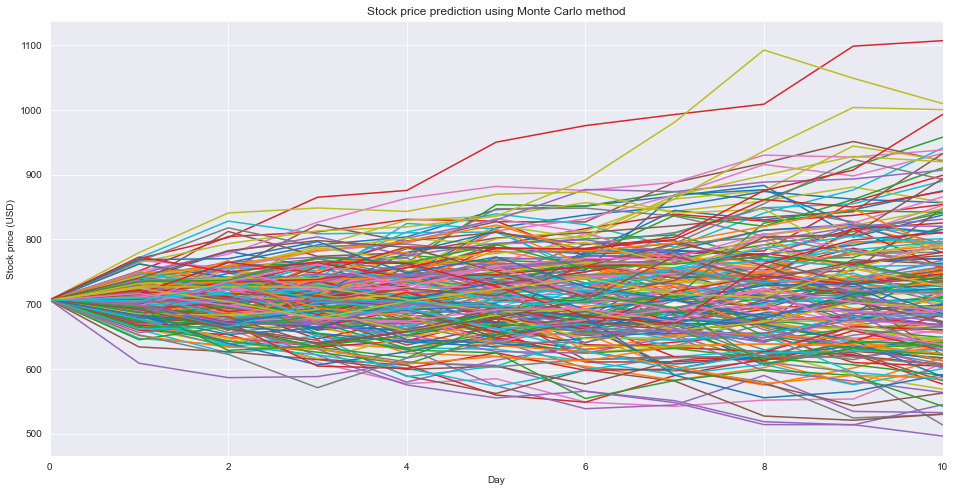

In [10]:
plt.figure(figsize=(16,8))
if iterations > 200:
    max_plot = 200
else:
    max_plot = iterations
plt.plot(future_price[:, : max_plot]);
plt.xlabel("Day")
plt.ylabel('Stock price (USD)')
plt.title('Stock price prediction using Monte Carlo method');
plt.xlim([0, t_intervals]);

#### Plot the stock price distribution at the end of interval

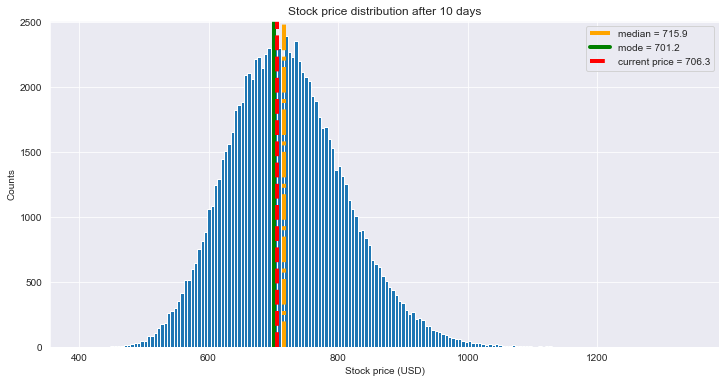

In [11]:
hist = np.histogram(future_price[t_intervals-1], bins='auto')
median = np.median(future_price[t_intervals-1])
mode = hist[1][np.argmax(hist[0])]
plt.figure(figsize=(12,6))
plt.hist(future_price[t_intervals-1], bins='auto')
plt.axvline(x=median, lw=4, ls='-.', label='median = '+ str(round(median, 1)), c='orange')
plt.axvline(x=mode, lw=4, label='mode = '+ str(round(mode, 1)), c='green')
plt.axvline(x=future_price[0][0], lw=4, ls='--', label='current price = '+ str(round(future_price[0][0], 1)), c='red')
plt.xlabel('Stock price (USD)')
plt.ylabel('Counts')
plt.title('Stock price distribution after ' + str(t_intervals) + ' days')
plt.legend();